# Visualising CANGRD Data for Canadian Climate Variables

Data available from CANGRD is in GeoTiff format and has to be interated with and opened by a python library called Rasterio.

In [ ]:
import rasterio
import rasterio.features
import rasterio.warp
import matplotlib.pyplot as plt
import numpy as np

with rasterio.open('/Users/maxMax/Downloads/CANGRD_hist_monthly_anom_ps50km_TMEAN_2018-12.tif') as dataset: #importing dataset using rasterio
    
    temperature_data = dataset.read(1) #all data appears to be in first 'band'

    metadata = { #printing the metadata for debugging and plotting purposess
        'count': dataset.count,
        'width': dataset.width,
        'height': dataset.height,
        'bounds': dataset.bounds,
        'transform': dataset.transform,
        'crs': dataset.crs
    }

temperature_data_masked = np.ma.masked_where(temperature_data == 9999.9, temperature_data) #becaause the empty cell values here are given a value of 9999.9, they skew the values on the plot and make it impossible to differentiate variables on land therefore they are masked

plt.figure(figsize=(10, 8)) #plotting
plt.imshow(temperature_data_masked, cmap='coolwarm')
plt.colorbar(label="Temperature Anomaly (°C)")
plt.title("Temperature Anomaly for July 2018 (CANGRD) - Masked")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Unfortunately, Jupyter Notebook has isssues running the Rasterio library and I have not yet been able to fix this error. The code works well in Pycharm. Therefore, below is python code transforming the .tif file to a .txt file for easy plotting with matplotlib:

In [ ]:
tif_file = r'/Users/maxMax/Downloads/CANGRD_hist_monthly_anom_ps50km_TMEAN_2018-12.tif'
txt_file = r'/Users/maxMax/Downloads/CANGRD_hist_monthly_anom_ps50km_TMEAN_2018-12.txt'

with rasterio.open(tif_file) as dataset: #opening .tif file with rasterio module
    data = dataset.read(1)  #only 1st band seems to have data

    np.savetxt(txt_file, data, fmt='%0.6f') #saving data to a text file

print(f'Data has been saved to {txt_file}')

The plotted data from CANGRD for December 2018 is shown below, with no value cells masked:

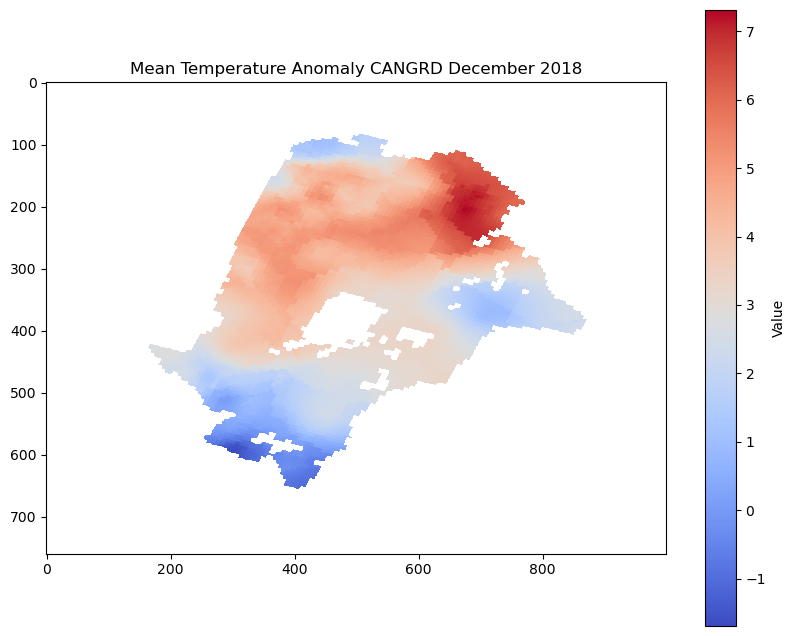

In [43]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(r'/Users/maxMax/Downloads/CANGRD_hist_monthly_anom_ps50km_TMEAN_2018-12.txt')
masked_data = np.ma.masked_where(data == 9999.900000, data) #masking no value data because otherwise temp is so skewed that temp differences on land cannot be distinguished
plt.figure(figsize = (10, 8))
plt.imshow(masked_data, cmap='coolwarm')
plt.colorbar(label='Value')
plt.title('Mean Temperature Anomaly CANGRD December 2018')
plt.show()